In [1]:
import pandas as pd

from prepare import *
from acquire import *

import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression, RFE

from prepare import *
import explore as e

In [2]:
#set seaborn color pallete
sns.set_palette('plasma')
pal = sns.set_palette('plasma')
palette = sns.color_palette().as_hex()

In [3]:
df, revert_key, replace_key = wrangle_data()

df = df.replace(replace_key)

In [4]:
train, validate, test = train_validate_test_split(df, 'is_pes')

In [5]:
train_age, val_age, test_age = train_validate_test_split(df, 'age')

In [6]:
train[train.columns[110:]]

,marital_status,religion,evangelical_christian,church_attendance,political_party_identity,political_party_lean,summary_of_political_party_data,family_income_nine_categories,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
1859,Divorced,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Seldom,Independent,The Democratic Party,Dem/Lean Dem,"$20,000 to less than $30,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,3.057078,0,1,0,0
96,Divorced,Roman Catholic,"No, not born-again or evangelical Christian",Once a week,Democrat,nan,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999","You are PROBABLY registered, but there is a ch...",Liberal,Internet User,No,0.433484,1,2,0,0
420,Divorced,Agnostic,nan,Never,Independent,The Democratic Party,Dem/Lean Dem,"$40,000 to less than $50,000","$30-$74,999",nan,Liberal,Internet User,No,2.413983,0,1,0,0
1424,Never been married,Roman Catholic,"No, not born-again or evangelical Christian",Once or twice a month,Democrat,nan,Dem/Lean Dem,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.362586,0,1,0,0
114,Divorced,Roman Catholic,"Yes, born-again or evangelical Christian",Once a week,Independent,The Democratic Party,Dem/Lean Dem,"$50,000 to less than $75,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.303046,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,Married,Nothing in particular,nan,Seldom,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,2.336849,1,2,0,0
957,Married,Roman Catholic,"No, not born-again or evangelical Christian",A few times a year,Independent,The Republican Party,Rep/Lean Rep,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Internet User,No,0.553714,0,1,0,0
239,Married,Mormon (Church of Jesus Christ of Latter-day S...,"No, not born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$150,000 or more","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,1.368277,0,1,0,0
1795,Married,"Protestant (for example, Baptist, Methodist, N...","Yes, born-again or evangelical Christian",Once a week,Independent,The Republican Party,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,1.338218,0,1,0,0


In [7]:
class Attitudes_explore():
    '''
    Performs a series of analyses and explore functions on various features in our data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the self of the class.
        '''
        self.df =  df
        
 
        
    def printout_all_chi_squared(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with our target. The function then prints out the test results for 
        each feature.
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

        
        #Loop through categorical features
        for col in categorical_features:
            
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get test results of chi-squared test
            test_results = stats.chi2_contingency(contingency_table)

            #Print out results of chi-squared test for each column
            print("Correlation between", col, "and the target")
    
            print(test_results)
        
            #Space in between each feature for readability 
            print(" ")
    
    
    def printout_only_significant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with out target. However, this function only prints out the results
        of the chi-squared test for the features which are shown to have a stastically significant
        relationship with the target. That is, the p-value of the chi-squared test is less than 0.5
        
        '''
        
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through every cateogiral feature
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Run a chi-squared test on the features
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #Print out the results of the chi-squared test if significant
            if p < 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
                    
            
    def get_list_of_significant_columns(df, target_feature):
        '''
        This function runs a chi-squared test on every categorical feature in the dataframe
        with the target variable. The function returns of list of features that have a stastically
        signficant relationship with the target
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()

      
        #Make empty list of significant feature names
        significant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Create contigency table
            contingency_table = pd.crosstab(df[col], df[target_feature])
            
            #Get the results of the chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is less than 0.05, append feature to list
            if p < 0.05:  
                
                significant_features.append(col)
        
        #Return list
        return(significant_features)
        
        
    def printout_insignificant_p_value(df, target_feature):
        '''
        This function loops through every categorical feature in the dataframe and runs a 
        chi-squared test with the target variable. If the chi-squared test reveals an
        insignificant relationship with the target, this function prints the result of the
        chi-squared test.
        '''
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Loop through categorical features
        for col in categorical_features:
    
            #Create contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared test
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p-value is greater than or equal to 0,05, print result of chi-sqared
            if p >= 0.05:
                print("Correlation between", col, "and the target")
    
                print(chi2, p, degf, expected)
       
                print(" ")
        
        
    def get_list_of_insignificant_columns(df, target_feature):
        '''
        This function loops through every categorical features and performs a chi-squared
        test with the target variable. If the chi-sqaured test reveals an insignificant 
        relationship with the target feature, the categorical feature is appended to a list
        of insignificant features.
        ''' 
        #Get list of categorical features
        categorical_features = df.drop(columns = ['qkey', "weight", target_feature]).columns.to_list()


        #Make list of insignificant features
        insignificant_features = []
        
        #Loop through categorical features
        for col in categorical_features:
    
            #Make contingency table
            contingency_table = pd.crosstab(df[col], df[target_feature])

            #Run chi-squared
            chi2, p, degf, expected = stats.chi2_contingency(contingency_table)
            
            #If p value is greater than or equal to 0.05, append feature to list.
            if p >= 0.05:
                
                insignificant_features.append(col)
            
        return(insignificant_features)
    
    
    def get_k_best(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables.
        The function then splits the data into X, the predictive features, and y, the 
        target feature. It then runs Select K Best to determine the features most predictive
        of the target.
        
        Note: Since, we created dummies, the name of the target feature has _1 added to the end.
        '''
        
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        # Create model
        kbest = SelectKBest(f_regression, k=n)
        
        #Fit the model
        kbest.fit(X, y)
        
        #Return the most predictive columns
        return X.columns[kbest.get_support()]
    
    def get_recursive_features(df, n, target_feature, columns_to_drop):
        '''
        This function takes a DataFrame and makes dummy variables. 
        The function then splits teh data into X, the predictive features, and y, the target feature.
        It then runs Recursive Feature Elimination to determine the features most predictive of target.
        '''
        df = df.drop([columns_to_drop])
        
        #Get dummies
        df_dummies = pd.get_dummies(df, drop_first = True)
        
        #Split X and y
        X, y = df_dummies.drop(columns = [target_feature, 'qkey']), df_dummies[target_feature]
        
        #Create model
        rfe = RFE(estimator=LinearRegression(), n_features_to_select= n)
        #Fit the model
        rfe.fit(X, y)
        return X.columns[rfe.get_support()]
    
    def bar_plot(df, x_val, target):
        sns.barplot(x=x_val,y=target,data=df)
        plt.tight_layout()
        plt.show()
        
    def count_plot(df, col):
        plt.figure(figsize=(8,5))
        sns.countplot(x=col ,data=df)
        
        plt.tight_layout()
        plt.show()

## Let's explore age groups and income-related topics

In [8]:
income = ['family_income_three_categories', 'family_income_nine_categories', 'happen_wealthgap', 
         'share_americans_in_upper_class', 'share_americans_in_middle_class', 'share_americans_in_lower_class']

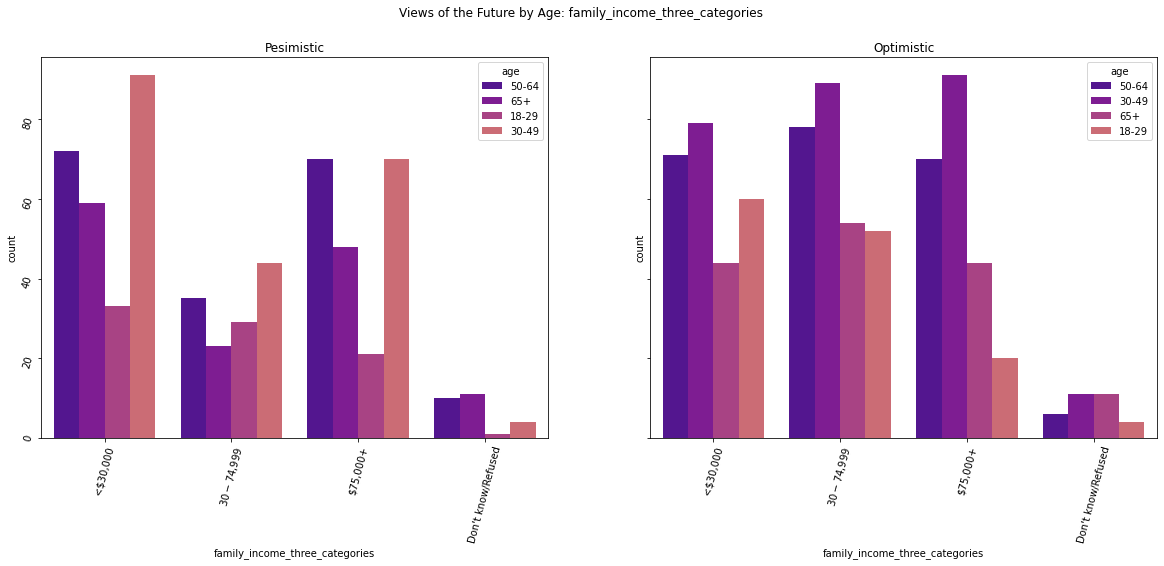

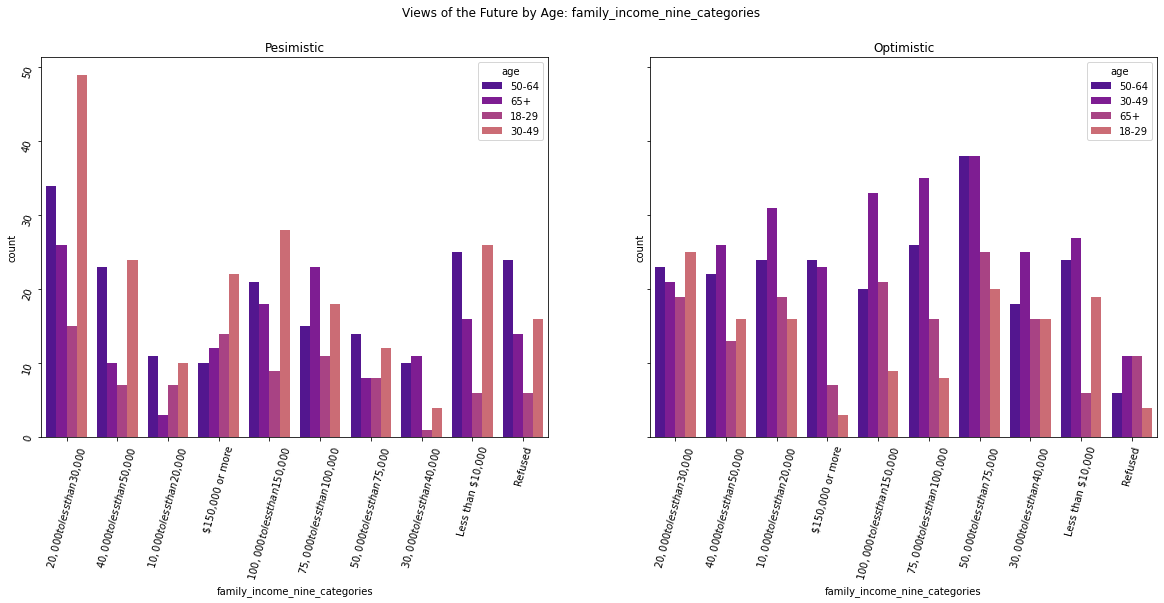

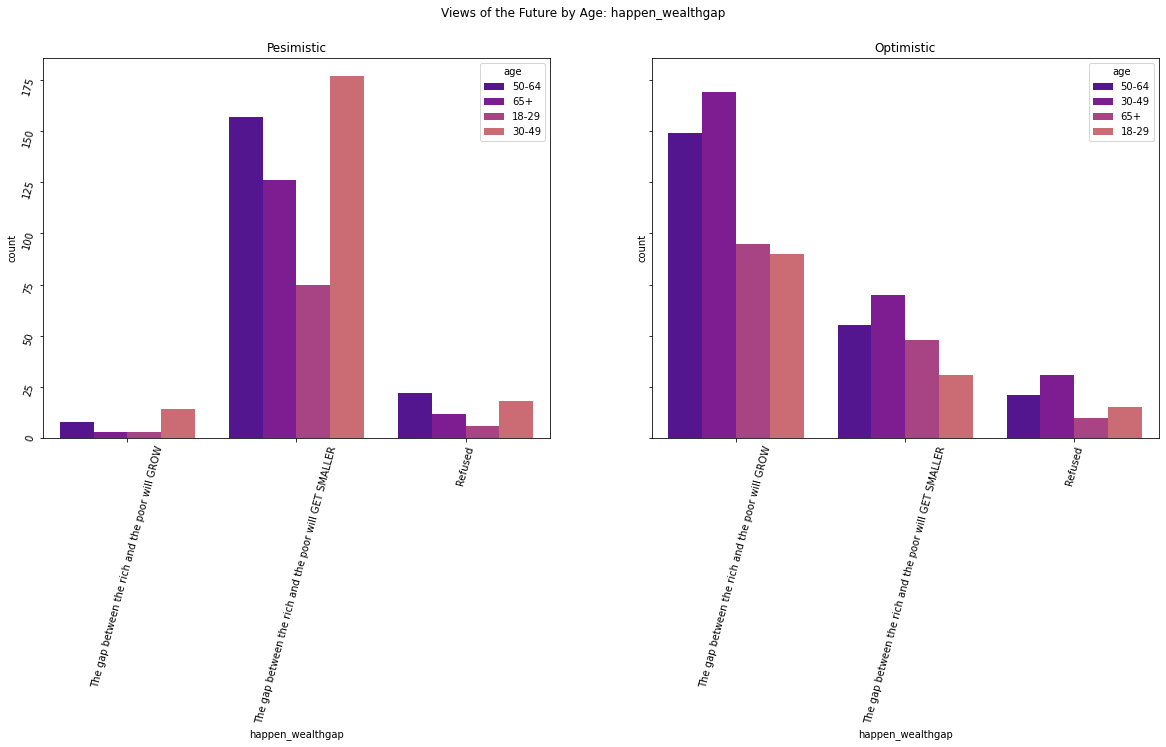

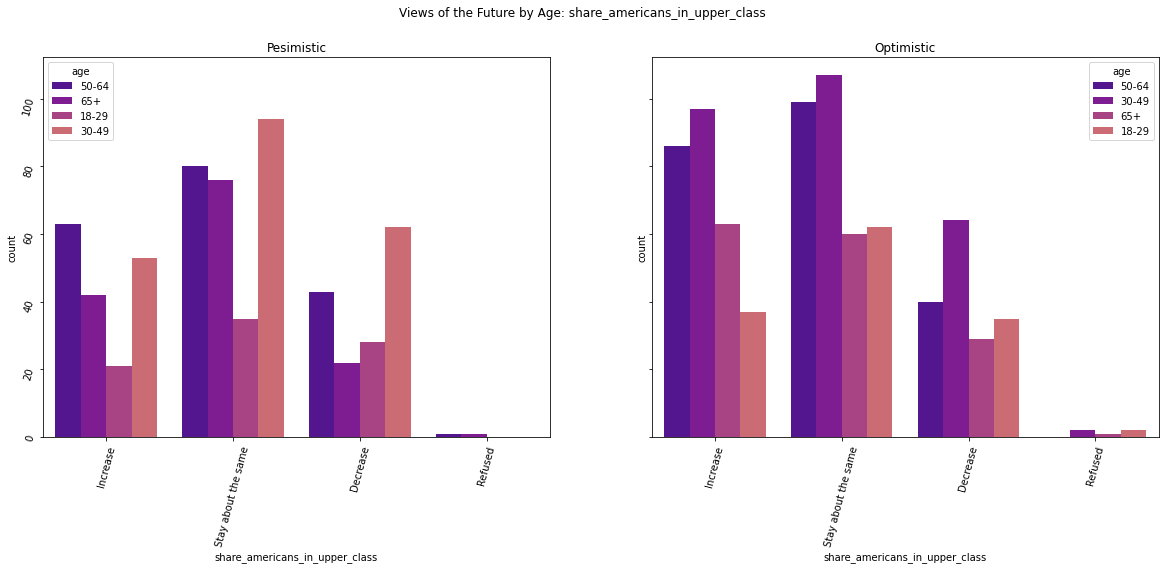

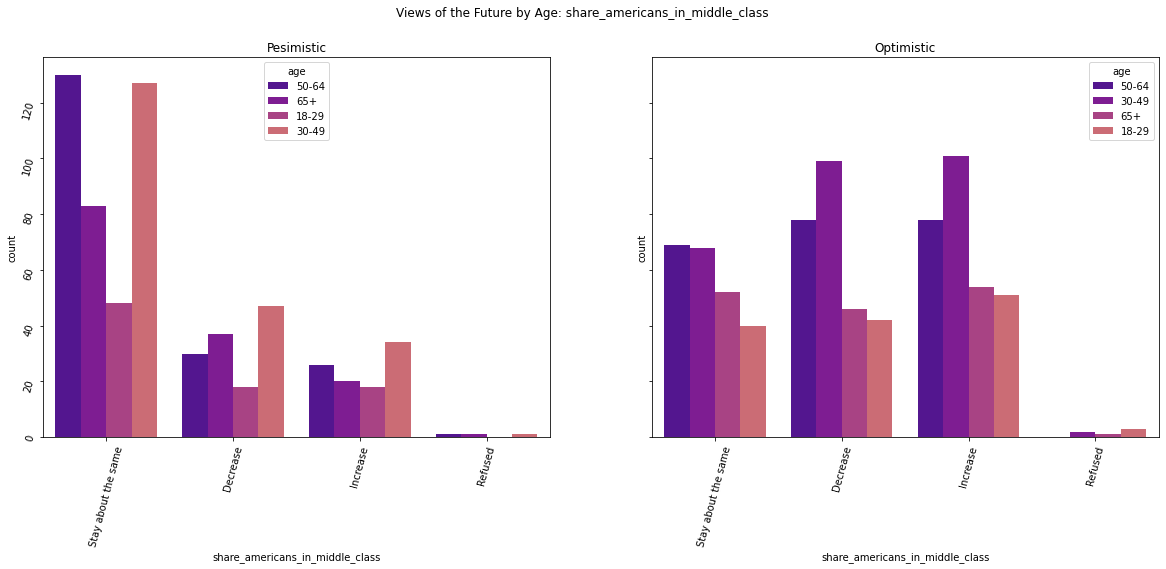

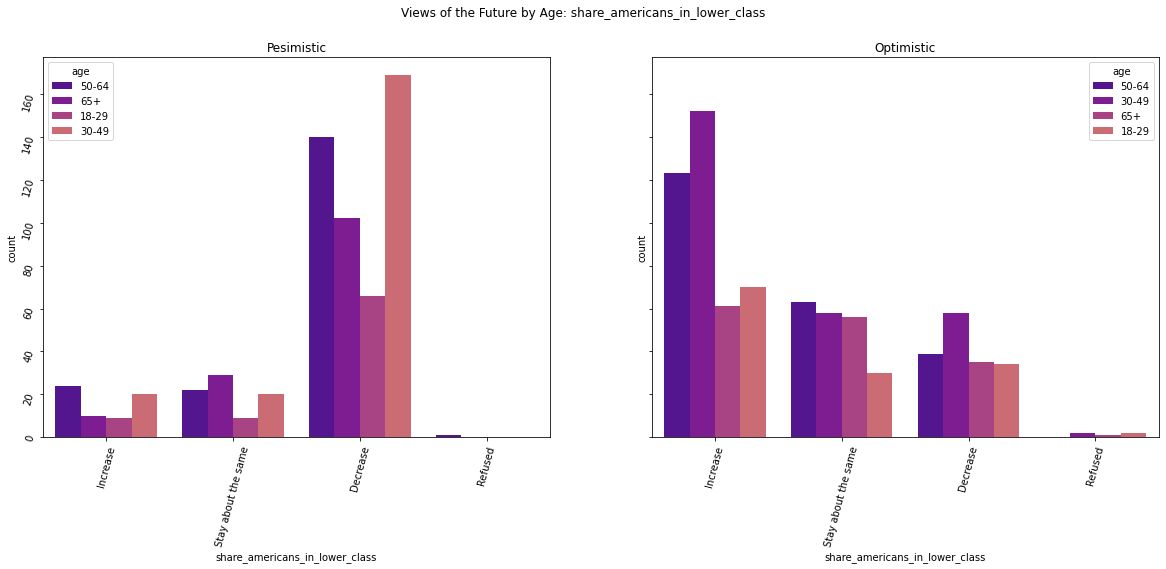

In [9]:
for col in income:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [10]:
df.columns[90:]

Index(['sci_tech', 'major_corps', 'rel_groups', 'gov_in_wash', 'state_local',
       'media', 'military', 'college_uni', 'schools', 'metro', 'census_region',
       'age', 'sex', 'highest_education_three_categories',
       'highest_education_six_categories', 'hispanic_or_latino', 'race',
       'race_and_ethnicity', 'birthplace', 'us_citizen', 'marital_status',
       'religion', 'evangelical_christian', 'church_attendance',
       'political_party_identity', 'political_party_lean',
       'summary_of_political_party_data', 'family_income_nine_categories',
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object')

In [11]:
train.family_income_nine_categories.value_counts()

$50,000 to less than $75,000      245
$100,000 to less than $150,000    159
$75,000 to less than $100,000     158
$20,000 to less than $30,000      146
$30,000 to less than $40,000      142
$40,000 to less than $50,000      141
$10,000 to less than $20,000      133
$150,000 or more                  117
Less than $10,000                 108
Refused                            59
Name: family_income_nine_categories, dtype: int64

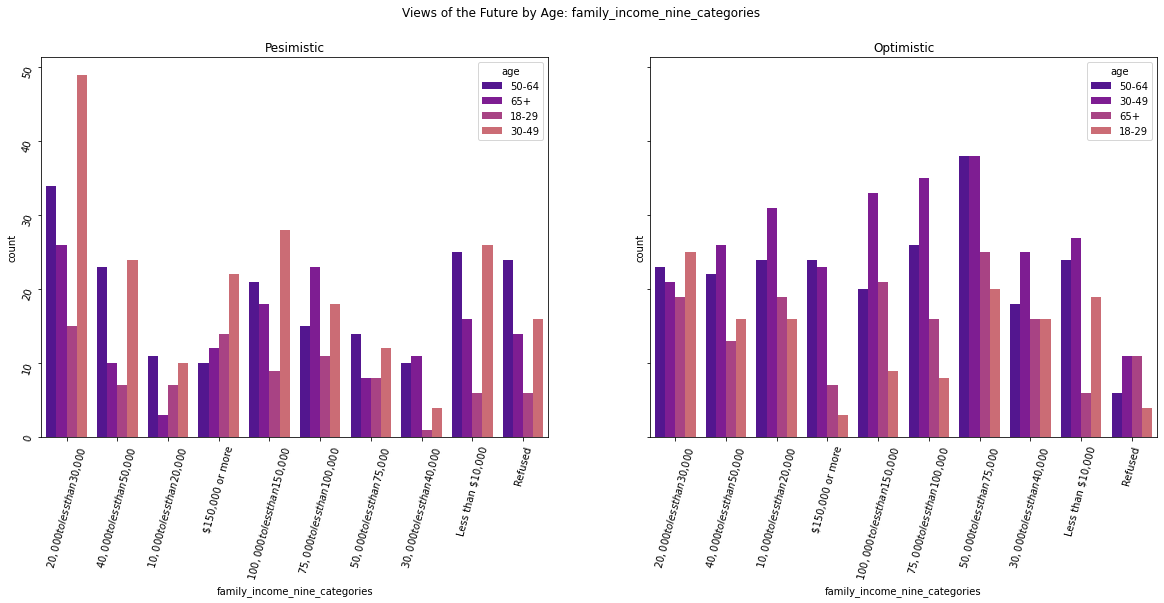

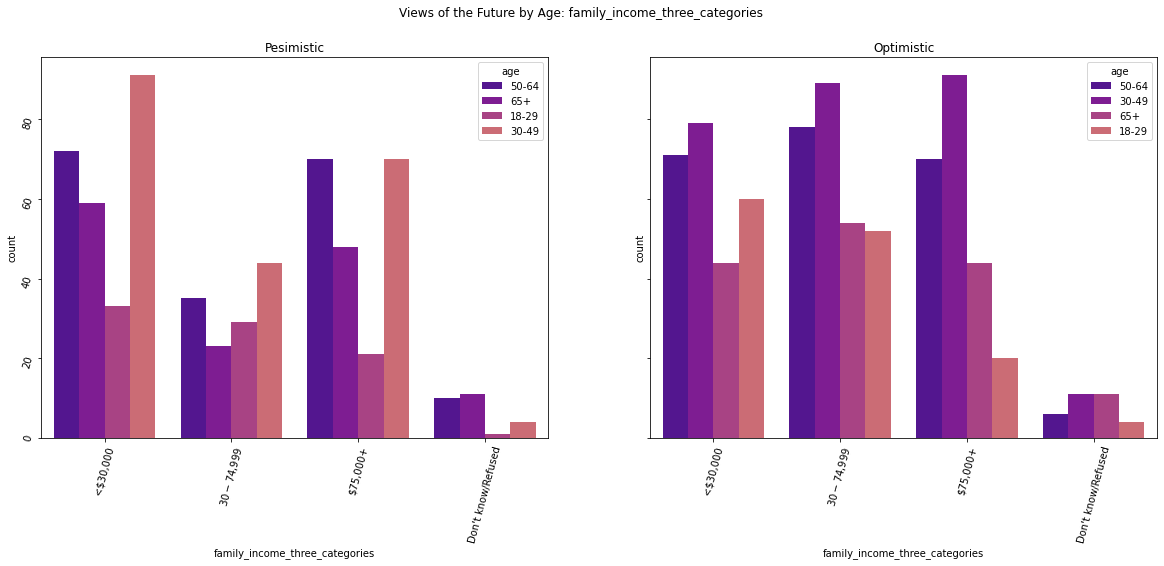

In [12]:
for col in ['family_income_nine_categories', 'family_income_three_categories']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

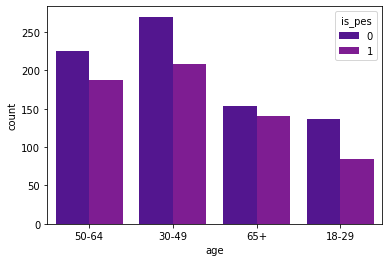

In [13]:
sns.countplot(data=train[train.age!='DK/REF'], x='age', hue='is_pes')
plt.show()

In [14]:
pes_percent = []

In [15]:
edu_percent = pd.crosstab(index=train['age'], columns=train['highest_education_six_categories'])
edu_percent

highest_education_six_categories,Associate's degree,College graduate/some post grad,Don't know/Refused,High school graduate,Less than high school,Postgraduate,"Some college, no degree"
age,,,,,,,
18-29,21,63,0,65,15,13,43
30-49,53,114,2,116,34,79,81
50-64,25,83,2,147,30,45,80
65+,16,43,0,99,24,55,57
DK/REF,0,1,0,1,1,0,0


In [16]:
df.columns

Index(['qkey', 'device_type', 'language', 'form', 'attitude', 'avg_family',
       'happen_general', 'happen_health', 'happen_race', 'happen_usa',
       ...
       'family_income_three_categories', 'registered_to_vote',
       'political_views', 'internet_access', 'volunteer', 'weight', 'is_pes',
       'pes_val', 'is_very_pes', 'is_very_opt'],
      dtype='object', length=128)

In [17]:
pol_party_percent = pd.crosstab(index=df['age'], columns=train['political_views'], normalize='index')
pol_party_percent

political_views,Conservative,Liberal,Moderate,Refused,Very conservative,Very liberal
age,,,,,,
18-29,0.118182,0.259091,0.409091,0.031818,0.036364,0.145455
30-49,0.208768,0.198330,0.421712,0.020877,0.058455,0.091858
50-64,0.250000,0.143204,0.419903,0.029126,0.087379,0.070388
65+,0.333333,0.176871,0.316327,0.006803,0.108844,0.057823
DK/REF,0.666667,0.000000,0.000000,0.000000,0.333333,0.000000


In [18]:
df.political_views.value_counts()

Moderate             977
Conservative         570
Liberal              480
Very liberal         213
Very conservative    204
Refused               71
Name: political_views, dtype: int64

---
---
---

# Univariate

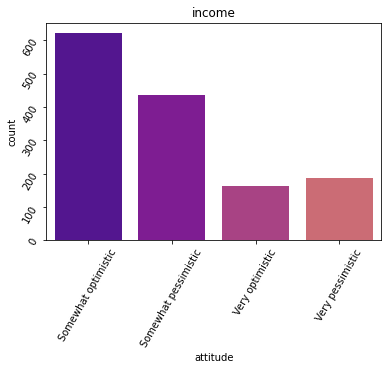

In [19]:
sns.countplot(data=train, x='attitude').set_title('income')
plt.tick_params(labelrotation=60)
plt.show()

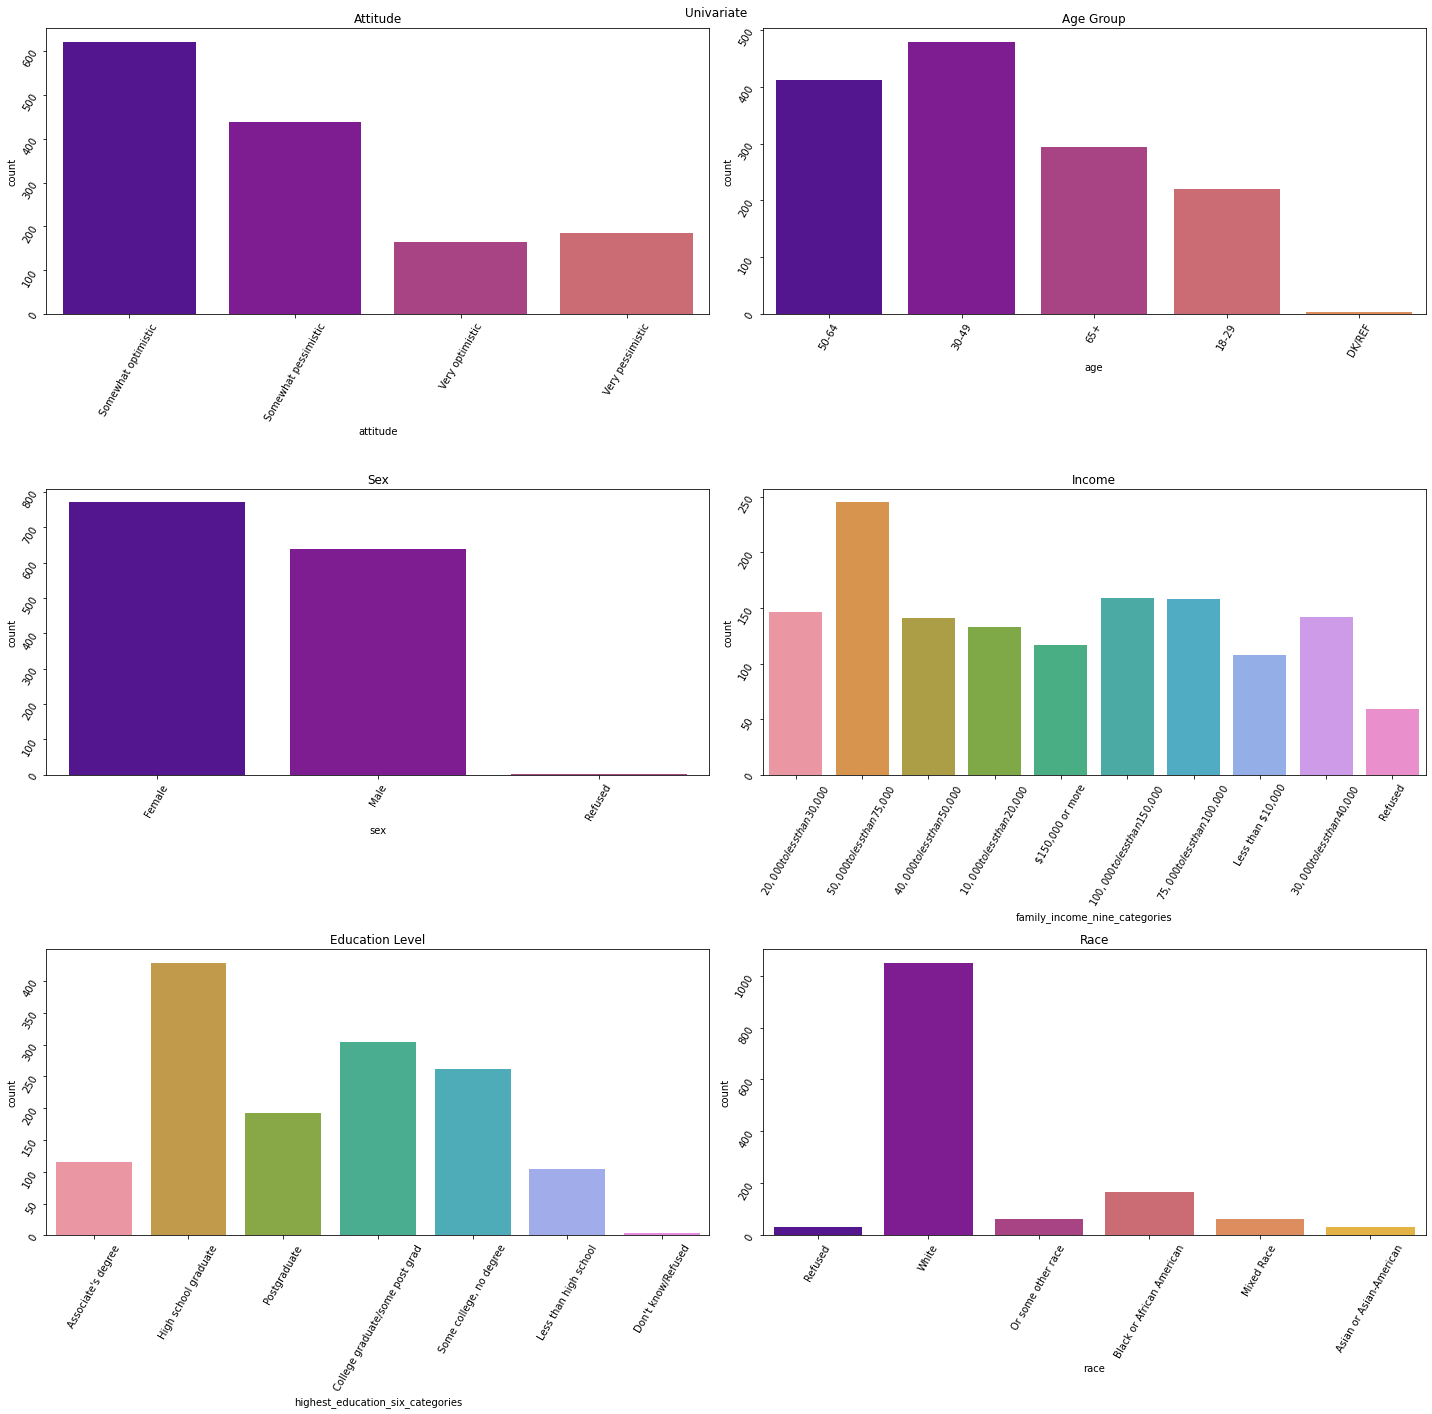

In [20]:
#for col in ['attitude', 'age', 'sex', 'education', 'income']:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=False, sharex=False,  figsize=(20,20))

# Set suptitle
fig.suptitle(f'Univariate')
#plt.xticks(rotation=45)

# First plot and its title
sns.countplot(data=train, x='attitude', ax=axes[0,0]).set_title('Attitude')
axes[0,0].tick_params(labelrotation=60)

# Second plot and its title
sns.countplot(data=train, x='age', ax=axes[0,1]).set_title('Age Group')
axes[0,1].tick_params(labelrotation=60)

# Third plot and its title
sns.countplot(data=train, x='sex', ax=axes[1,0]).set_title('Sex')
axes[1,0].tick_params(labelrotation=60)

# Fourth plot and its title
sns.countplot(data=train, x='family_income_nine_categories', ax=axes[1,1]).set_title('Income')
axes[1,1].tick_params(labelrotation=60)

# Fifth plot and its title
sns.countplot(data=train, x='highest_education_six_categories', ax=axes[2,0]).set_title('Education Level')
axes[2,0].tick_params(labelrotation=60)

# Sixth plot and its title
sns.countplot(data=train, x='race', ax=axes[2,1]).set_title('Race')
axes[2,1].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

---
---
---

In [21]:
train.attitude

1859     Somewhat optimistic
96      Somewhat pessimistic
420      Somewhat optimistic
1424     Somewhat optimistic
114     Somewhat pessimistic
                ...         
678     Somewhat pessimistic
957      Somewhat optimistic
239      Somewhat optimistic
1795     Somewhat optimistic
1297     Somewhat optimistic
Name: attitude, Length: 1408, dtype: object

In [22]:
pd.pivot_table(train, index='age', columns='attitude').pes_val

attitude,Somewhat optimistic,Somewhat pessimistic,Very optimistic,Very pessimistic
age,,,,
18-29,1.0,2.0,0.0,3.0
30-49,1.0,2.0,0.0,3.0
50-64,1.0,2.0,0.0,3.0
65+,1.0,2.0,0.0,3.0
DK/REF,NaN,2.0,0.0,3.0


In [23]:
military=[]
[military.append(col) for col in df.columns if col.__contains__('military')]
military

['priority_reduce_military', 'priority_increase_military', 'military']

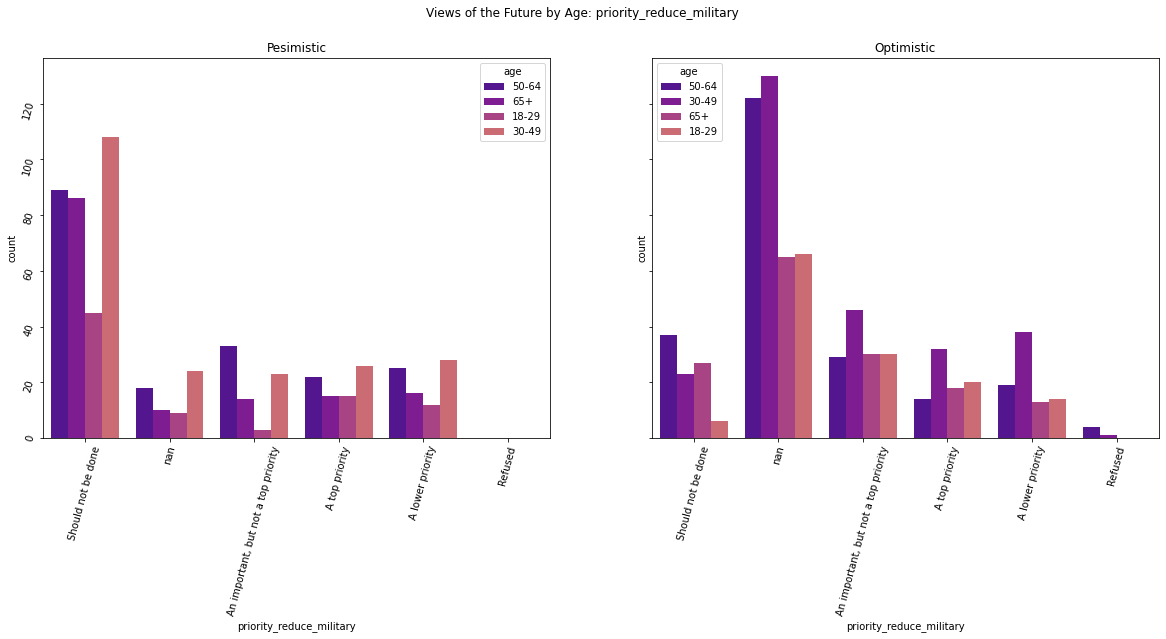

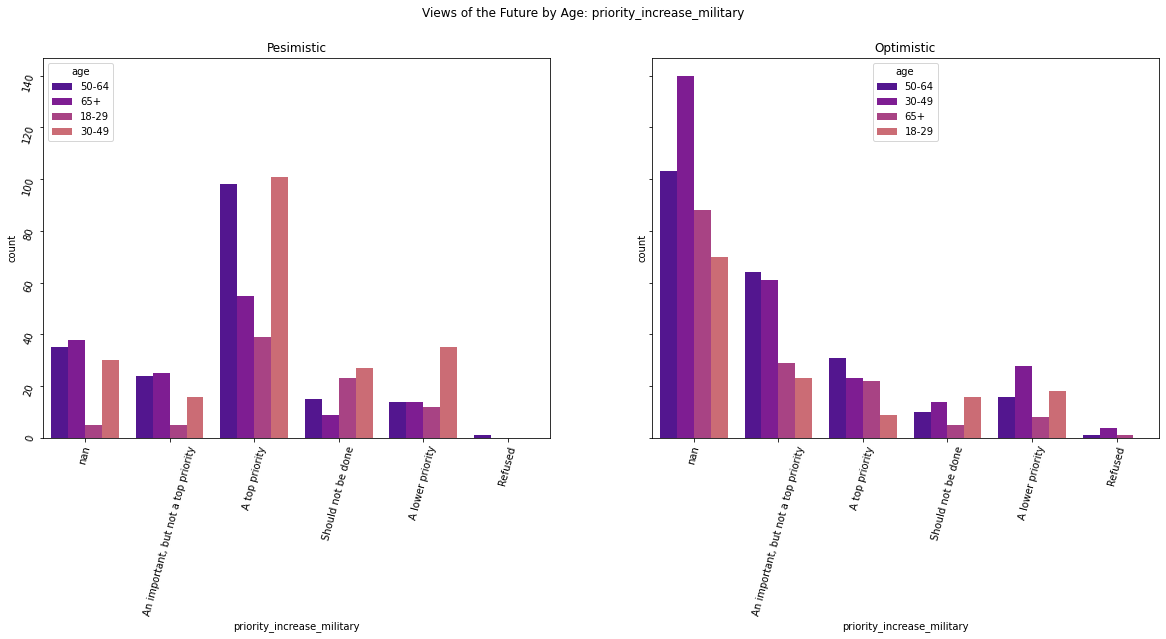

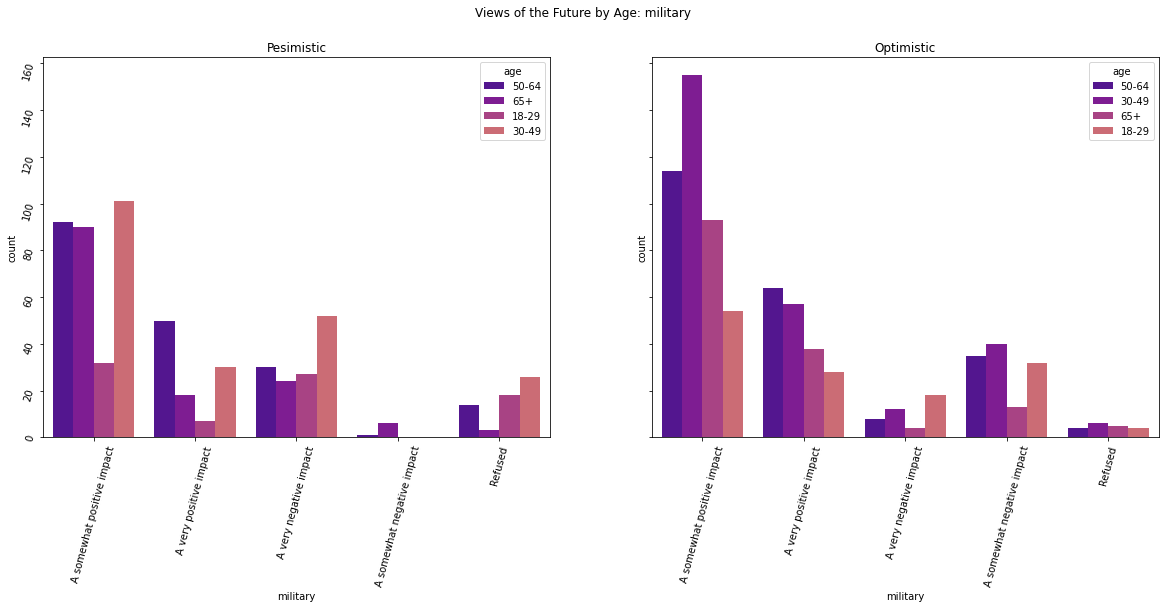

In [24]:
for col in military:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

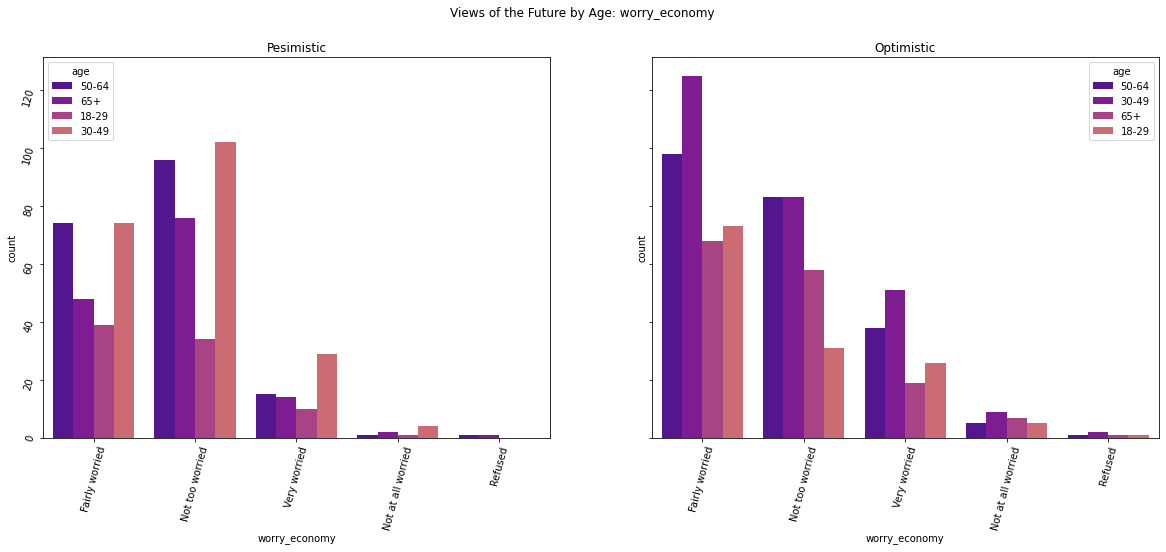

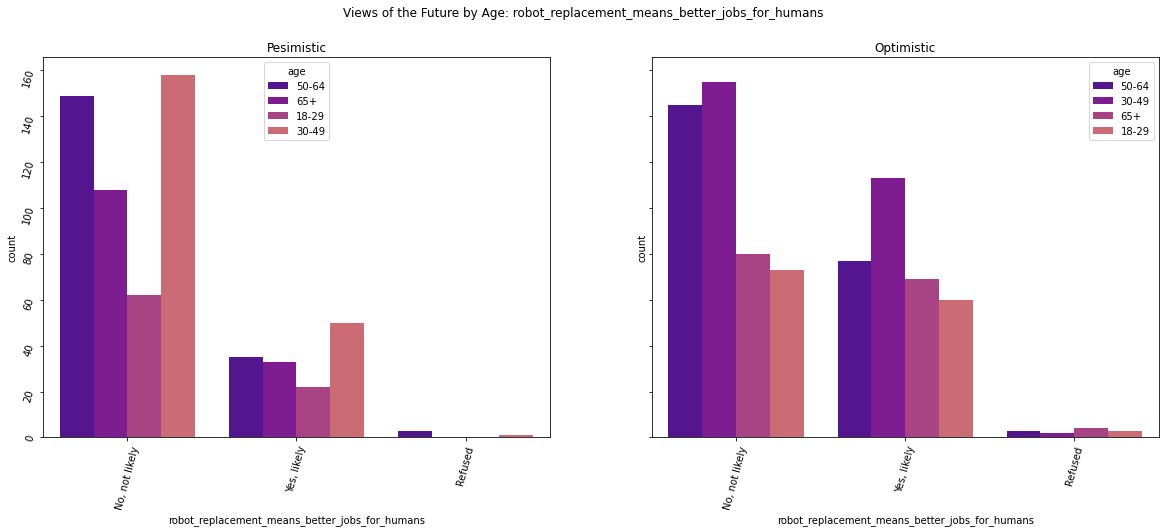

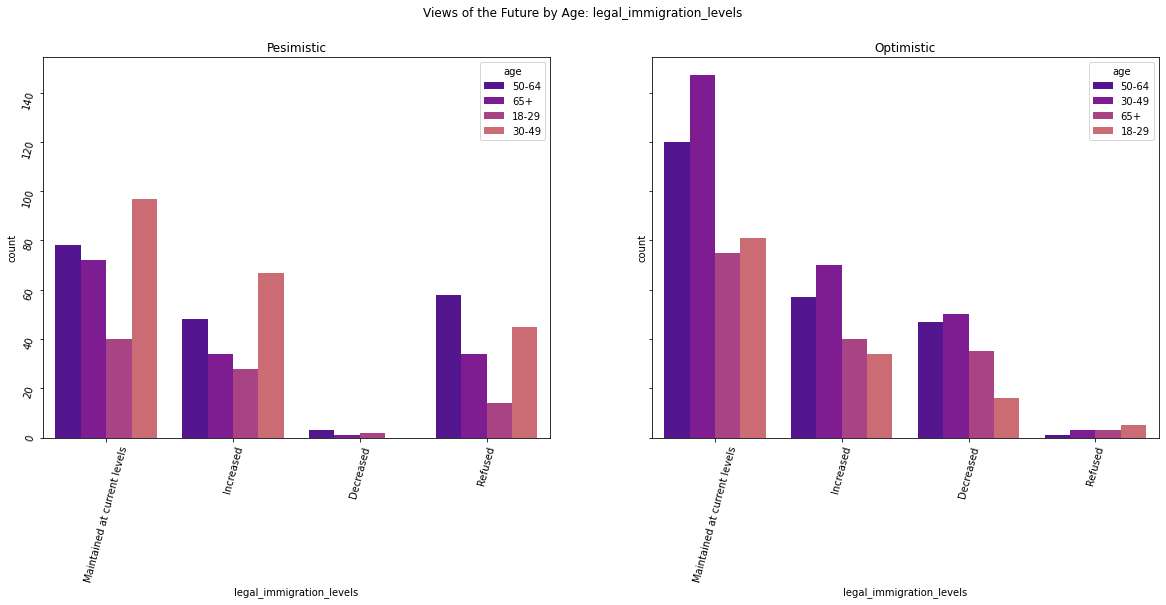

In [25]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Age: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1) & (train.age!='DK/REF')], x= col, ax=axes[0], hue='age')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0) & (train.age!='DK/REF')], x= col, ax=axes[1], hue='age')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

<AxesSubplot:xlabel='age'>

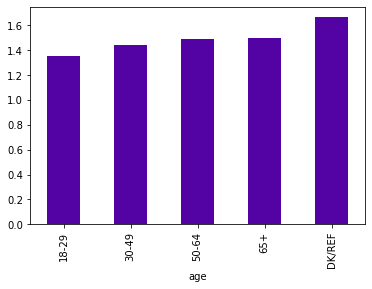

In [26]:
train.groupby('age').pes_val.mean().plot(kind='bar')

In [27]:
train.groupby('place').pes_val.mean().plot(kind='bar')

KeyError: 'place'

In [ ]:
pd.pivot_table(data=train_age, index='age', values='is_pes', margins=True)

In [ ]:
pd.crosstab(index=[train_age.age, train_age.is_pes],
            columns=train_age.family_income_three_categories,
            colnames=['income'], normalize='index')

In [ ]:
df.columns[100:]

In [ ]:
pd.crosstab(index=[train_age.age, train_age.is_pes],
            columns=train_age.political_party_identity,
            colnames=['Party'], normalize='index')

In [ ]:
df.party_lean.value_counts()

In [ ]:
df.political_party_identity.unique()

## Region

In [28]:
train_region, val_region, test_region = train_validate_test_split(df, 'census_region')

In [29]:
train_region.census_region.value_counts()

South        528
Midwest      344
West         306
Northeast    230
Name: census_region, dtype: int64

In [30]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train_age.political_party_identity,
            colnames=['Party'], normalize='columns')

Party                 Democrat  Independent   Refused  Republican  \
census_region is_pes                                                
Midwest       0       0.110368     0.114286  0.083333    0.125604   
              1       0.107023     0.091429  0.250000    0.111111   
Northeast     0       0.080268     0.085714  0.166667    0.096618   
              1       0.086957     0.074286  0.000000    0.038647   
South         0       0.234114     0.194286  0.250000    0.236715   
              1       0.163880     0.137143  0.000000    0.178744   
West          0       0.120401     0.114286  0.166667    0.101449   
              1       0.096990     0.188571  0.083333    0.111111   

Party                 Something else  
census_region is_pes                  
Midwest       0             0.132530  
              1             0.132530  
Northeast     0             0.072289  
              1             0.060241  
South         0             0.180723  
              1             0.228916  
West          0             0.060241  
              1             0.132530

In [37]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train_age.worry_economy,
            colnames=['Economy'], normalize='index')

Economy               Fairly worried  Not at all worried  Not too worried  \
census_region is_pes                                                        
Midwest       0             0.483516            0.032967         0.307692   
              1             0.482353            0.011765         0.070588   
Northeast     0             0.477612            0.014925         0.328358   
              1             0.461538            0.019231         0.057692   
South         0             0.456140            0.035088         0.339181   
              1             0.457364            0.007752         0.170543   
West          0             0.488095            0.011905         0.345238   
              1             0.432990            0.010309         0.082474   

Economy                Refused  Very worried  
census_region is_pes                          
Midwest       0       0.010989      0.164835  
              1       0.000000      0.435294  
Northeast     0       0.014925      0.164179  
              1       0.000000      0.461538  
South         0       0.000000      0.169591  
              1       0.007752      0.356589  
West          0       0.000000      0.154762  
              1       0.010309      0.463918

Whichever the region, the majority of people worry about the economy

In [39]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train_age.robot_replacement_means_better_jobs_for_humans,
            colnames=['Robots = Better Jobs'], normalize='index')

Robots = Better Jobs  No, not likely   Refused  Yes, likely
census_region is_pes                                       
Midwest       0             0.637363  0.021978     0.340659
              1             0.788235  0.000000     0.211765
Northeast     0             0.552239  0.014925     0.432836
              1             0.788462  0.000000     0.211538
South         0             0.643275  0.000000     0.356725
              1             0.705426  0.015504     0.279070
West          0             0.523810  0.000000     0.476190
              1             0.804124  0.000000     0.195876

In [36]:
pd.crosstab(index=[train.census_region, train.is_pes],
            columns=train_age.legal_immigration_levels,
            colnames=['Immigration = Better Economy'], normalize='columns')

Immigration = Better Economy  Decreased  Increased  \
census_region is_pes                                 
Midwest       0                0.122699   0.109005   
              1                0.104294   0.137441   
Northeast     0                0.067485   0.075829   
              1                0.049080   0.085308   
South         0                0.208589   0.199052   
              1                0.208589   0.161137   
West          0                0.104294   0.104265   
              1                0.134969   0.127962   

Immigration = Better Economy  Maintained at current levels   Refused  
census_region is_pes                                                  
Midwest       0                                   0.111959  0.444444  
              1                                   0.096692  0.111111  
Northeast     0                                   0.096692  0.222222  
              1                                   0.066158  0.000000  
South         0                                   0.241730  0.000000  
              1                                   0.155216  0.000000  
West          0                                   0.114504  0.000000  
              1                                   0.117048  0.222222

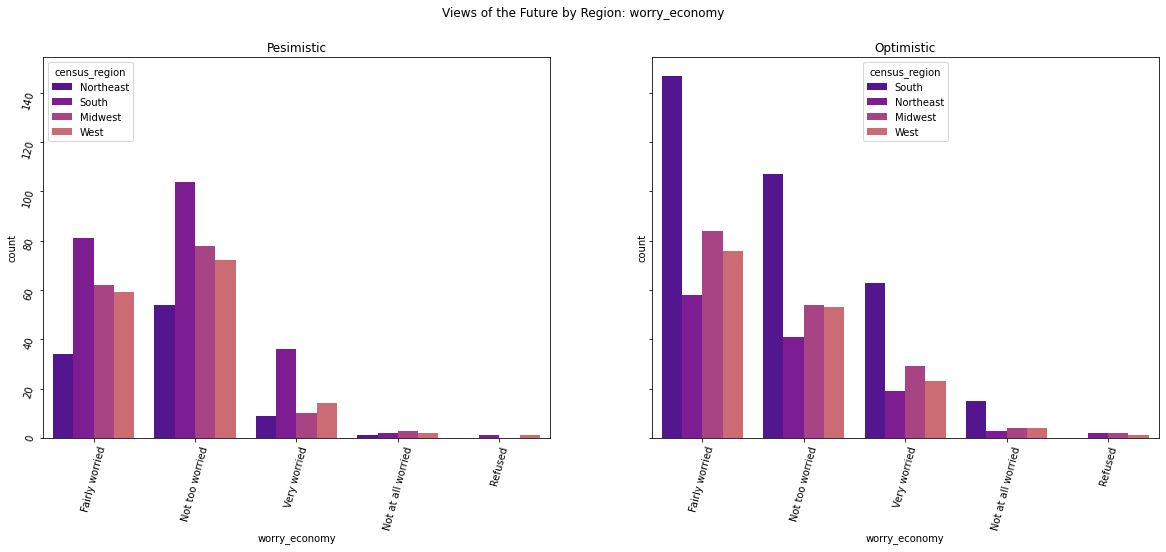

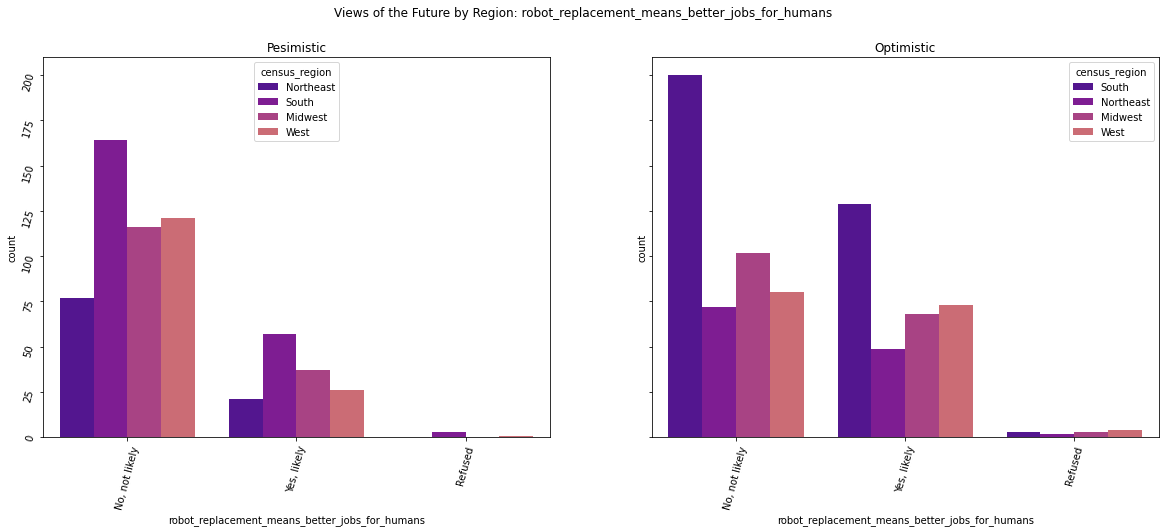

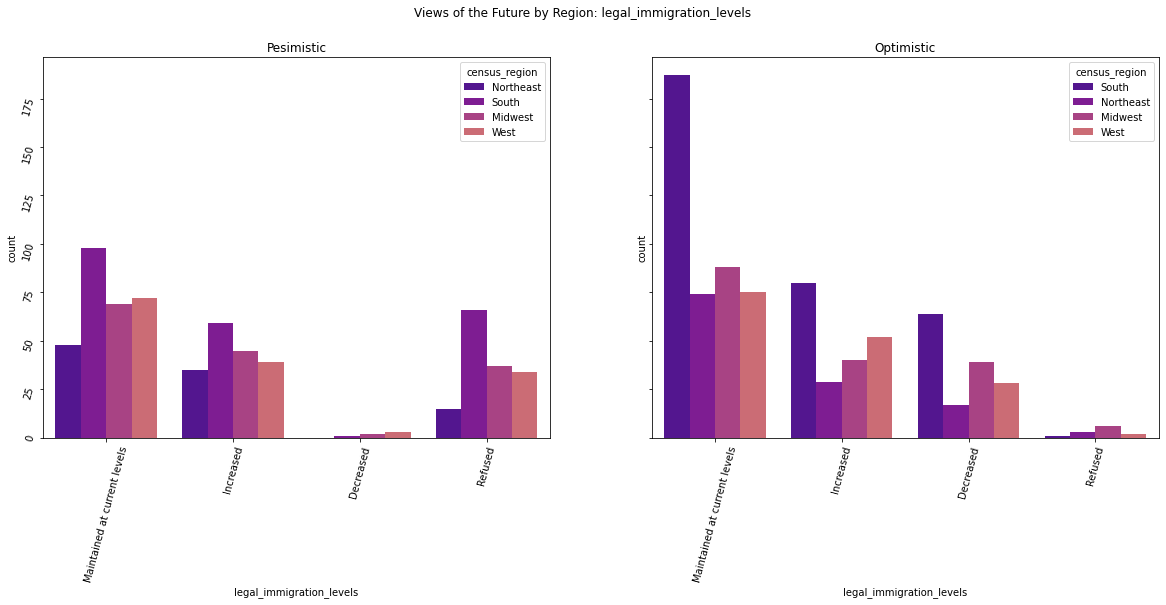

In [31]:
# Economy
# based off of question: contains section about economy
economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']
for col in economy:
# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True,  figsize=(20,7))

    # Set suptitle
    fig.suptitle(f'Views of the Future by Region: {col}')
    #plt.xticks(rotation=45)

    # First plot and its title
    sns.countplot(data=train[(train.is_pes==1)], x= col, ax=axes[0], hue='census_region')
    axes[0].set_title('Pesimistic')
    axes[0].tick_params(labelrotation=75)

    # Second plot and its title
    sns.countplot(data=train[(train.is_pes==0)], x= col, ax=axes[1], hue='census_region')
    axes[1].set_title('Optimistic')
    axes[1].tick_params(labelrotation=75)

In [ ]:
df.columns[100:]

In [78]:
for col in train.drop(columns=['census_region']).columns:
    print(train_region[train_region.census_region=='South'][col].value_counts()[:1])

201501620202    1
Name: qkey, dtype: int64
Mobile phone    298
Name: device_type, dtype: int64
English    517
Name: language, dtype: int64
Form 2    279
Name: form, dtype: int64
Somewhat optimistic    229
Name: attitude, dtype: int64
Get worse    229
Name: avg_family, dtype: int64
The U.S. economy will be WEAKER    290
Name: happen_general, dtype: int64
Health care will be LESS affordable    308
Name: happen_health, dtype: int64
Race relations will IMPROVE    249
Name: happen_race, dtype: int64
The U.S. will be LESS important in the world    310
Name: happen_usa, dtype: int64
The gap between the rich and the poor will GROW    382
Name: happen_wealthgap, dtype: int64
The public education system will GET WORSE    271
Name: happen_pub_ed, dtype: int64
Religion will become LESS important    249
Name: happen_rel, dtype: int64
nan    279
Name: happen_65up_f1, dtype: int64
nan    249
Name: happen_child_f2, dtype: int64
The country will be MORE politically divided    350
Name: happen_politics,

KeyError: 1.0

In [82]:
for region in df.census_region.unique():
    print(region)
    print(train_region[train_region.census_region==region]['highest_education_six_categories'].value_counts())
    print('-----------------')

Northeast
High school graduate               81
College graduate/some post grad    51
Postgraduate                       43
Some college, no degree            35
Less than high school              11
Associate's degree                  9
Name: highest_education_six_categories, dtype: int64
-----------------
South
High school graduate               160
College graduate/some post grad     98
Some college, no degree             93
Postgraduate                        82
Less than high school               48
Associate's degree                  46
Don't know/Refused                   1
Name: highest_education_six_categories, dtype: int64
-----------------
Midwest
High school graduate               106
Some college, no degree             72
College graduate/some post grad     58
Postgraduate                        53
Associate's degree                  34
Less than high school               21
Name: highest_education_six_categories, dtype: int64
-----------------
West
High school graduate   

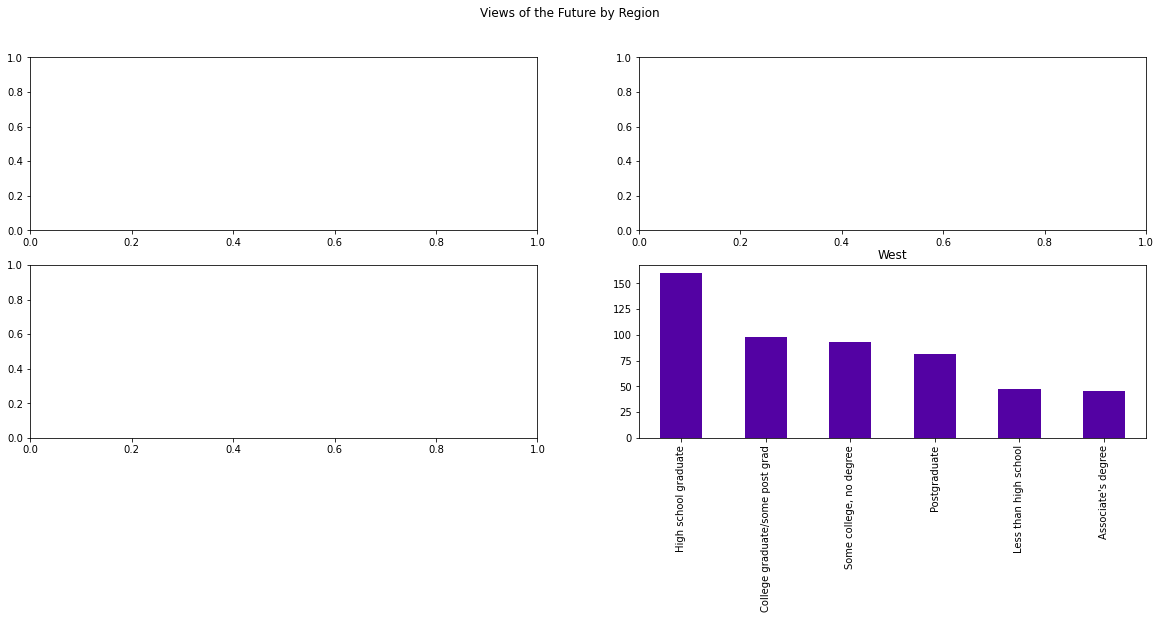

In [144]:
# Economy
# based off of question: contains section about economy
# economy = ['worry_economy', 'robot_replacement_means_better_jobs_for_humans', 'legal_immigration_levels']

# Set number of subplots, format (1 row and 2 cols), share Y axis, set figure size of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=False, sharex=False,  figsize=(20,7))

# Set suptitle
fig.suptitle(f'Views of the Future by Region')
#plt.xticks(rotation=45)

# First plot and its title
axes[0,0]=train_region[train_region.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('South')
#ax1.tick_params(labelrotation=75)

# Second plot and its title
axes[0,1]=train_region[train_region.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Northeast')
#ax2 = tick_params(labelrotation=75)

# Third plot and its title
axes[1,0]=train_region[train_region.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('Midwest')
#ax2.tick_params(labelrotation=75)

# Fourth plot and its title
axes[1,1]=train_region[train_region.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar').set_title('West')
#ax3.tick_params(labelrotation=75)

South        528
Midwest      344
West         306
Northeast    230
Name: census_region, dtype: int64


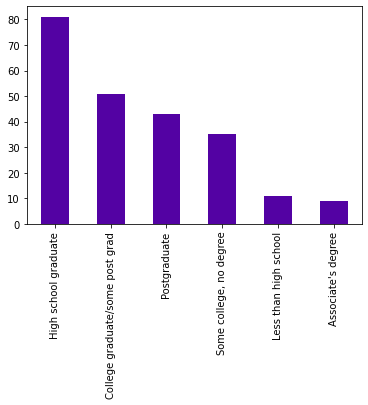

In [205]:
train_region[train_region.census_region=='Northeast']['highest_education_six_categories'].value_counts().plot(kind='bar')
print(train_region.census_region.value_counts())

<AxesSubplot:>

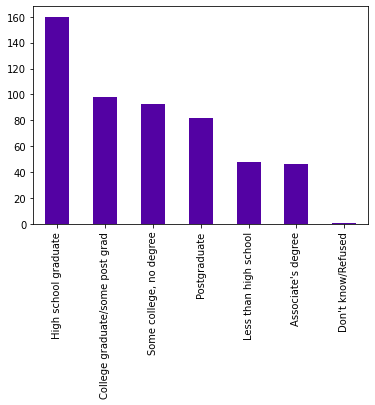

In [84]:
train_region[train_region.census_region=='South']['highest_education_six_categories'].value_counts().plot(kind='bar')

<AxesSubplot:>

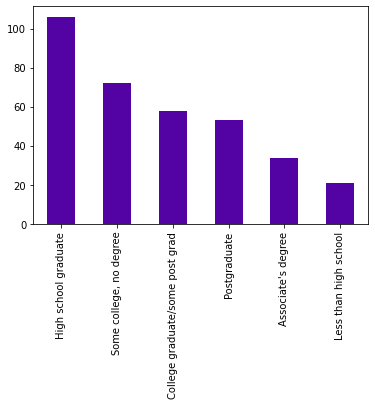

In [146]:
train_region[train_region.census_region=='Midwest']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [191]:
most_freq=[]

In [197]:
for region in train.census_region.unique():
    for col in train_region.drop(columns=['census_region']).columns:
        most_freq.append(train_region[train_region==region][col].value_counts()[:1].index)

<AxesSubplot:>

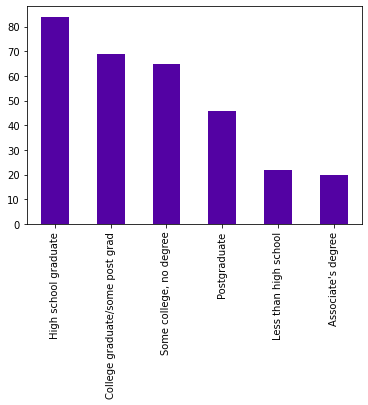

In [155]:
train_region[train_region.census_region=='West']['highest_education_six_categories'].value_counts().plot(kind='bar')

In [176]:
train.form.value_counts().mode()

0    695
1    713
dtype: int64

In [187]:
train.form.value_counts()[:1].index.tolist()

['Form 2']

In [188]:
train.form.value_counts()

Form 2    713
Form 1    695
Name: form, dtype: int64